In [1]:
from qiskit import * 
from qiskit.tools.visualization import plot_histogram

In [20]:
nqubits=5

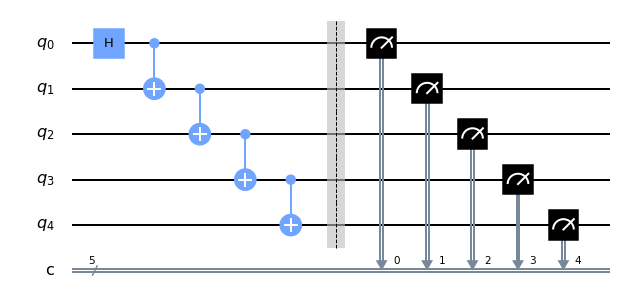

In [21]:
circuit=QuantumCircuit(nqubits, nqubits)
circuit.h(0)

for i in range(0, nqubits-1):
    circuit.cx(i,i+1)
circuit.barrier()
circuit.measure(range(nqubits),range(nqubits))
circuit.draw(output='mpl')

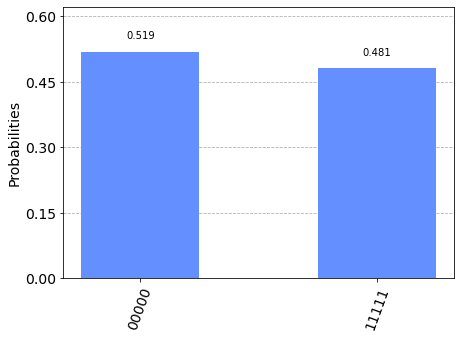

In [22]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit, backend=simulator, shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

In [23]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
device=provider.get_backend('ibmqx2')

ibmqfactory.load_account:WARNING:2020-09-10 23:09:47,001: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
job=execute(circuit, backend=device,shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5f5a961fab585b001a53b3bb
Job Status: job has successfully run


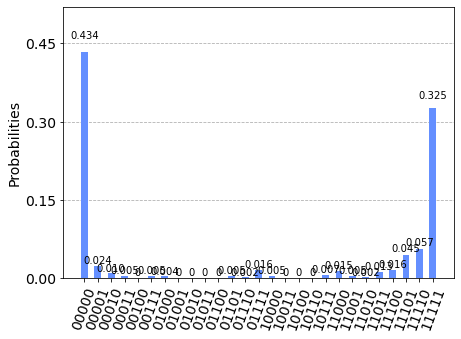

In [25]:
device_result=job.result()
plot_histogram(device_result.get_counts(circuit))

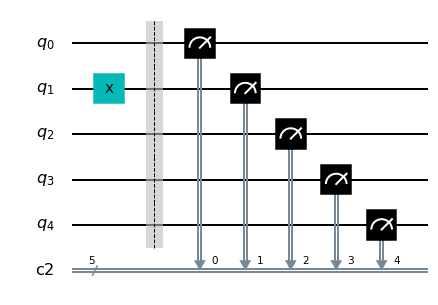

In [27]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
cal_circuits,state_labels= complete_meas_cal(qr=circuit.qregs[0], circlabel= 'measerrormitigationcal')
cal_circuits[2].draw(output='mpl')

In [28]:
cal_job=execute(cal_circuits, backend=device, shots=1024, optimization_level=0)
print(cal_job.job_id)
job_monitor(cal_job)
cal_results=cal_job.result()

<bound method IBMQJob.job_id of <qiskit.providers.ibmq.job.ibmqjob.IBMQJob object at 0x000001DDB8587D90>>
Job Status: job has successfully run


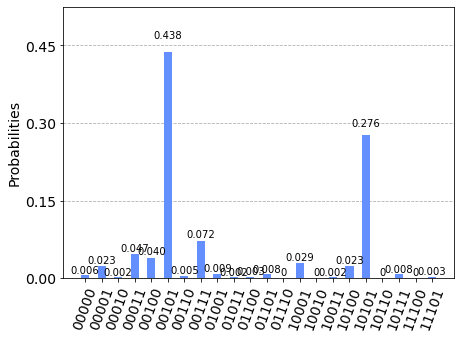

In [29]:
plot_histogram(cal_results.get_counts(cal_circuits[5]))

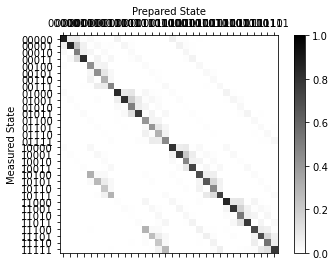

In [30]:
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
meas_fitter.plot_calibration()

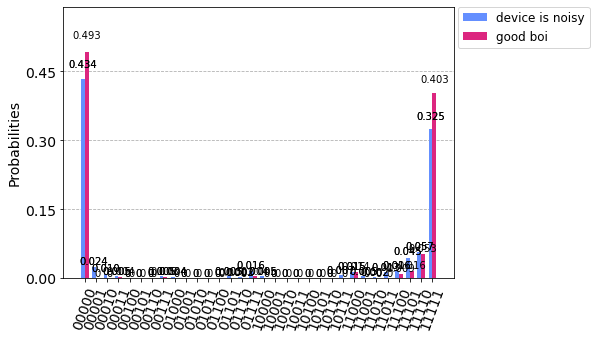

In [31]:
meas_filter=meas_fitter.filter
mitigated_result=meas_filter.apply(device_result)
device_counts=device_result.get_counts(circuit)
mitigated_counts=mitigated_result.get_counts(circuit)
plot_histogram([device_counts,mitigated_counts], legend=['device is noisy', 'good boi'])

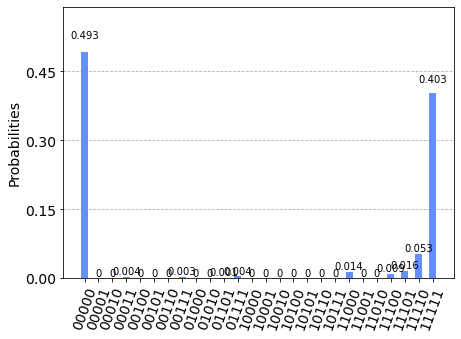

In [32]:
plot_histogram(mitigated_counts)